In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
sentence = "The product that I received was broken, horrible"
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

The product that I received was broken, horrible----------------- {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.765}


In [6]:
sentence = "I loved this product, it arrived fast!"
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

I loved this product, it arrived fast!--------------------------- {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.636}


In [1]:
## ANALISIS CON CSV
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
import pandas as pd

df = pd.read_csv('../translation/tests/olist_order_reviews_with_translation_dataset.csv')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_translated,review_comment_message_translated
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,NaN,I received it well before the stipulated deadl...
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,NaN,Congratulations lannister stores I loved shopp...


In [2]:
## Se eliminaron todos los NaN para cuestión de pruebas
df = df.dropna()
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_translated,review_comment_message_translated
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,I recommend,efficient appliance. on the website the brand ...
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,I highly recommend,"Reliable seller, ok product and delivery befor..."
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product didn&#39;t arrive,Terrible
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,Excellent,Grade 10 store
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,Very good.,I received exactly what I expected. Other orde...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 9 to 18829
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   review_id                          1913 non-null   object
 1   order_id                           1913 non-null   object
 2   review_score                       1913 non-null   int64 
 3   review_comment_title               1913 non-null   object
 4   review_comment_message             1913 non-null   object
 5   review_creation_date               1913 non-null   object
 6   review_answer_timestamp            1913 non-null   object
 7   review_comment_title_translated    1913 non-null   object
 8   review_comment_message_translated  1913 non-null   object
dtypes: int64(1), object(8)
memory usage: 149.5+ KB


In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sulak\AppData\Roaming\nltk_data...


In [5]:
df['scores'] = df['review_comment_message_translated'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_translated,review_comment_message_translated,scores
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,I recommend,efficient appliance. on the website the brand ...,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp..."
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,I highly recommend,"Reliable seller, ok product and delivery befor...","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,My product didn&#39;t arrive,Terrible,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,Excellent,Grade 10 store,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,Very good.,I received exactly what I expected. Other orde...,"{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'comp..."


In [6]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

<AxesSubplot:title={'center':'sentiment analysis'}>

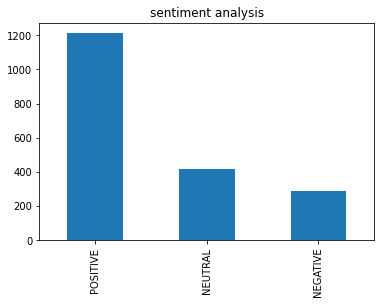

In [7]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")